We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [2]:
import numpy as np

In [3]:
import pandas as pd
data=pd.read_csv('airlines_passengers.csv')

Let’s display the first five rows of data

In [4]:
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [5]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [8]:
data.Month= pd.to_datetime(data.Month)

The next thing we can do is convert the month column to an index. 


In [9]:
data.set_index('Month', drop=True, inplace=True)

In [10]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

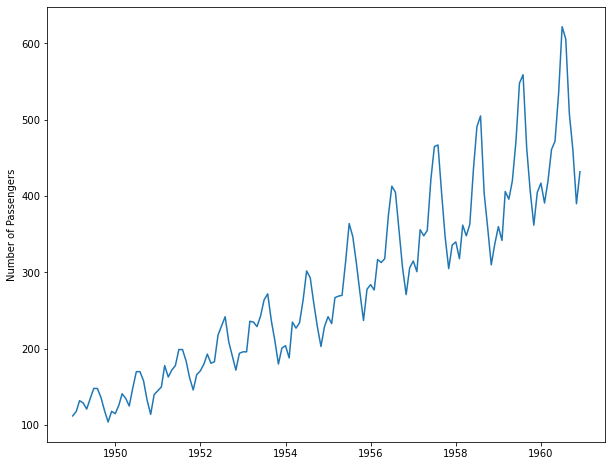

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10, 8])
plt.plot(data)
plt.ylabel("Number of Passengers")
plt.show()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [12]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [13]:
ad_fuller_result = adfuller(data['Passengers'], autolag='AIC')

Store our results in a dataframe display it

In [14]:
ad_fuller_result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Explain the results

In [ ]:
# The first value returned is ADF Statistic and the second value is the p value. p value is greater than 0.05, we 
# accept the null hypothesis so the data is not stationary.

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

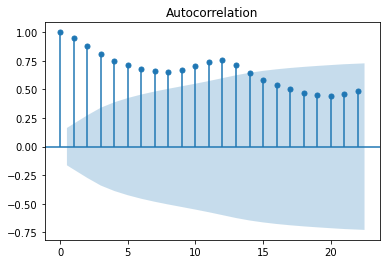

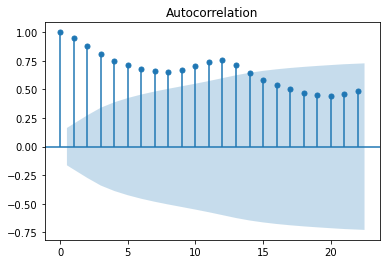

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Passengers'])

Calculate partial autocorrelation

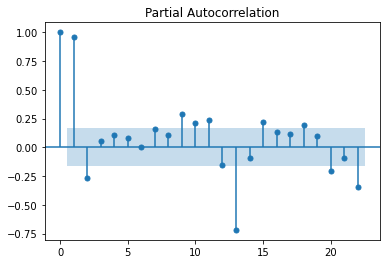

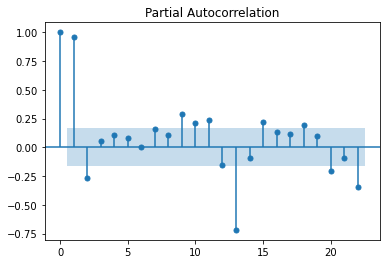

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Passengers'])

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


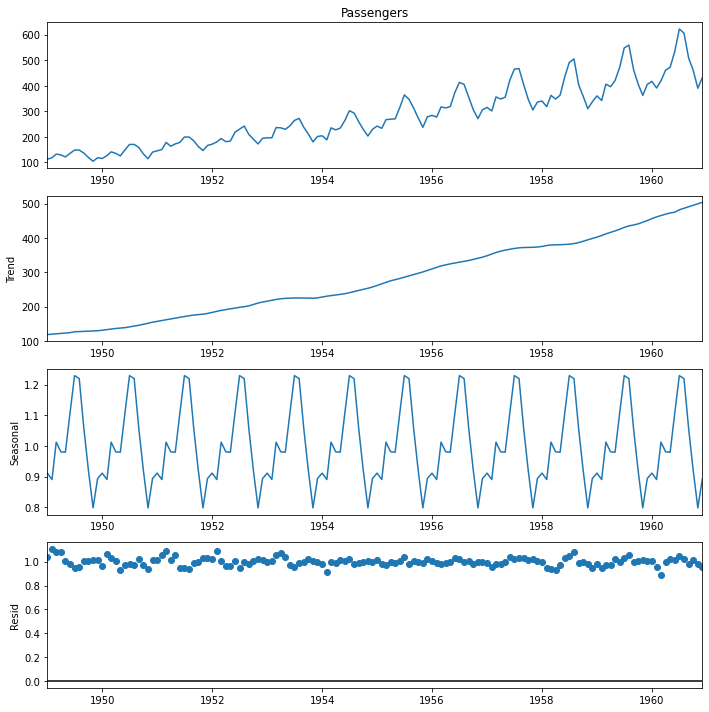

In [18]:
decompose = seasonal_decompose(data['Passengers'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
decompose.plot()
plt.show()


Can you describe the charts?


In [ ]:
"""The first chart plots our data. The second one shows the trend and in this case it is increasing with time.
The third ons shows the seasonality and we see a yearly pattern. The last one gives the residuals which do not fit the
trends, here they are not very dispersed."""

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [19]:
data_diff = np.log10(data['Passengers']).diff()

In [20]:
data_diff

Month
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
                ...   
1960-08-01   -0.011318
1960-09-01   -0.076609
1960-10-01   -0.042163
1960-11-01   -0.072636
1960-12-01    0.044419
Name: Passengers, Length: 144, dtype: float64

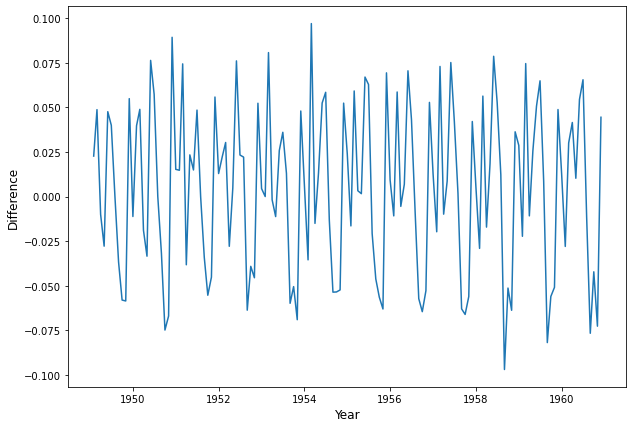

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(data_diff)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [22]:
ad_fuller = adfuller(data_diff.dropna(), autolag='BIC')
print(f'ADF Statistic: {ad_fuller[0]}')
print(f'p-value: {ad_fuller[1]}')

ADF Statistic: -3.053032010915465
p-value: 0.03022998764869646


In [23]:
data=data_diff.dropna()

MA(1)

In [25]:
split = len(data) - 10
train, test = data[0:split], data[split:]

In [24]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [32]:
import warnings

warnings.filterwarnings("ignore")

In [41]:
model1= ARMA(train, order=(0, 1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68898D+00    |proj g|=  1.47353D-03

At iterate    5    f= -1.68899D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     12      1     0     0   0.000D+00  -1.689D+00
  F =  -1.6889874739566841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Display the output

In [36]:
p1=model1.predict(len(train), len(data)-1)

MA(2)

In [40]:
model2= ARMA(train, order=(0, 2)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73646D+00    |proj g|=  5.66470D+00

At iterate    5    f= -1.73686D+00    |proj g|=  9.03904D-02

At iterate   10    f= -1.73688D+00    |proj g|=  1.39205D+00

At iterate   15    f= -1.73751D+00    |proj g|=  7.15850D-02

At iterate   20    f= -1.73752D+00    |proj g|=  4.28590D-01

At iterate   25    f= -1.73769D+00    |proj g|=  1.26057D+00

At iterate   30    f= -1.73770D+00    |proj g|=  5.62439D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


Display the output

In [43]:
p2=model2.predict(len(train), len(data)-1)

AR(2)

In [44]:
model3= ARMA(train, order=(2, 0)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69736D+00    |proj g|=  1.93828D-01

At iterate    5    f= -1.69740D+00    |proj g|=  1.00975D-02

At iterate   10    f= -1.69740D+00    |proj g|=  2.36100D-04

At iterate   15    f= -1.69740D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   3.331D-07  -1.697D+00
  F =  -1.6974000179668209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [45]:
p3=model3.predict(len(train), len(data)-1)

ARMA (?,?)

In [46]:
model4= ARMA(train, order=(3, 1)).fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80887D+00    |proj g|=  6.95815D+00

At iterate    5    f= -1.80959D+00    |proj g|=  1.97172D+00

At iterate   10    f= -1.81005D+00    |proj g|=  7.37591D-02

At iterate   15    f= -1.81006D+00    |proj g|=  3.62272D-01

At iterate   20    f= -1.81038D+00    |proj g|=  1.58638D+00

At iterate   25    f= -1.81052D+00    |proj g|=  8.80205D-03

At iterate   30    f= -1.81075D+00    |proj g|=  1.93514D-01

At iterate   35    f= -1.81251D+00    |proj g|=  2.75846D+00

At iterate   40    f= -1.81371D+00    |proj g|=  1.80768D+00

At iterate   45    f= -1.81373D+00    |proj g|=  2.35802D-03

At iterate   50    f= -1.81373D+00    |proj g|=  7.29443D-02

At iterate   55    f= -1.81376D+00    |proj g|=  4.23442D-02

At iterate   60    f= -1.81376D+00    |proj g|=  5.73421D-02

At iterate   65    f= -1.8

Display the output

In [47]:
p4=model4.predict(len(train), len(data)-1)

ARIMA(?,?)

In [48]:
model5= ARIMA(train, order=(3,1,1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66793D+00    |proj g|=  9.96630D+01

At iterate    5    f= -1.67528D+00    |proj g|=  1.62940D-01

At iterate   10    f= -1.67529D+00    |proj g|=  3.56592D+00

At iterate   15    f= -1.67629D+00    |proj g|=  3.18781D+01

At iterate   20    f= -1.67864D+00    |proj g|=  5.43313D-02

At iterate   25    f= -1.67864D+00    |proj g|=  7.44807D-02

At iterate   30    f= -1.67864D+00    |proj g|=  9.91983D-01

At iterate   35    f= -1.67867D+00    |proj g|=  3.27288D+00

At iterate   40    f= -1.67868D+00    |proj g|=  2.12881D-02

At iterate   45    f= -1.67868D+00    |proj g|=  4.43559D-01


 This problem is unconstrained.



At iterate   50    f= -1.67871D+00    |proj g|=  4.68496D+00

At iterate   55    f= -1.67893D+00    |proj g|=  1.88022D-01

At iterate   60    f= -1.67893D+00    |proj g|=  9.57372D-03

At iterate   65    f= -1.67893D+00    |proj g|=  5.53906D-01

At iterate   70    f= -1.67902D+00    |proj g|=  4.52633D-02

At iterate   75    f= -1.67906D+00    |proj g|=  1.14819D+00

At iterate   80    f= -1.67979D+00    |proj g|=  8.10061D-01

At iterate   85    f= -1.68002D+00    |proj g|=  1.70733D+00

At iterate   90    f= -1.68004D+00    |proj g|=  2.25738D-02

At iterate   95    f= -1.68004D+00    |proj g|=  2.38312D-01

At iterate  100    f= -1.68004D+00    |proj g|=  4.80586D-02

At iterate  105    f= -1.68004D+00    |proj g|=  2.71605D-04
  ys=-2.671E-11  -gs= 2.526E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
N


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Display the output

In [49]:
p5=model5.predict(len(train), len(data)-1)

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [50]:
from statsmodels.tools.eval_measures import rmse

In [51]:
for i in [p1, p2, p3, p4, p5]:
    print(rmse (i, test))

0.05028043806346268
0.04817460606694108
0.050116654044002514
0.04465719345015187
0.04898905601060992


In [ ]:
"""Smaller RMSE means a better fit to the model. We see that the value is higher with MA(1) and MA(2) than AR(2). 
Then I tried ARMA with order (2, 1) and (3, 1), the latter gave a smaller value, 0.051.
I then tried ARIMA(2, 1, 1) and (3, 1, 1) and the latter gave a smaller value, 0.071 which is the best fit to the data.
"""

Calculate AIC

In [157]:
from statsmodels.tsa.arima_model import ARMAResults 

In [160]:
model1.aic

-443.270668072478

In [161]:
model2.aic

-454.22896945031334

In [162]:
model3.aic

-443.5084047791744

In [163]:
model4.aic

-470.45991060083236

In [164]:
model5.aic

-431.53050057665547

In [ ]:
"""Here too, the 4th model ARMA(3, 1) gave the lowest AIC so it is the most accurate."""